MODEL SENSITIVITY ANALYSIS (P90)


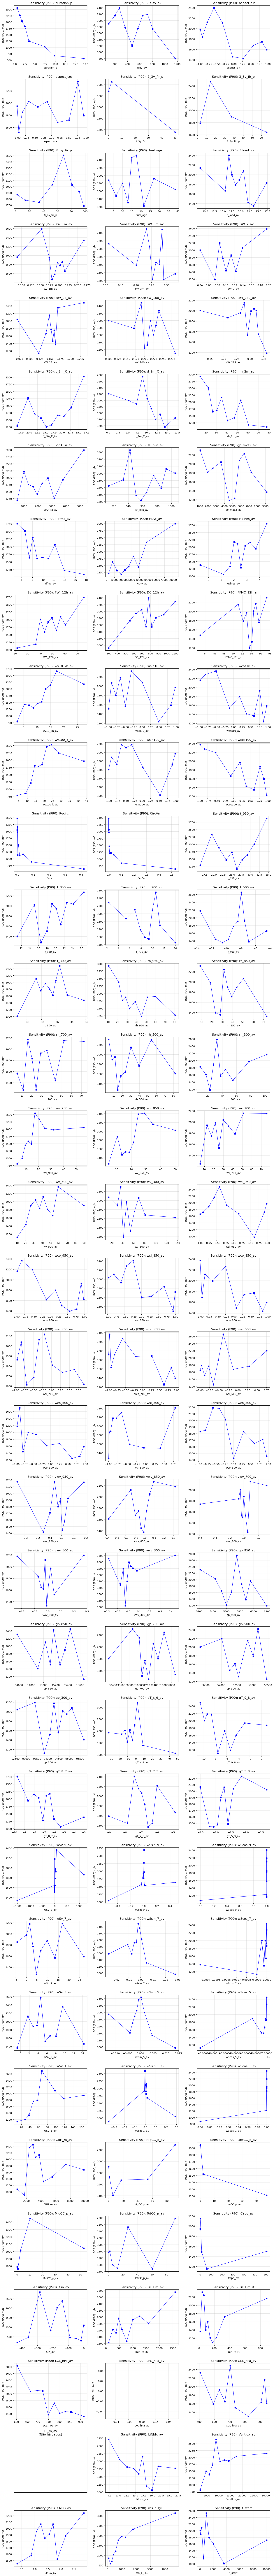

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminho do shapefile baseado no modelo
shapefile_path = r"..\..\Data\Processed\PT-FireSprd_v3.0\L2_FireBehavior\PT-FireSprd_v3.0_L2_model.shp"

# Ler o shapefile
df = gpd.read_file(shapefile_path)

print("=" * 80)
print("MODEL SENSITIVITY ANALYSIS (P90)")
print("=" * 80)

n_bins = 10

# Selecionar variáveis preditoras (excluindo 'ros_p' e 'geometry')
predictor_vars = [v for v in df.columns if v not in ['ros_p', 'geometry', "fuel_model", "landform", "land_use"]]

n_vars = len(predictor_vars)

# Determinar número de linhas e colunas para o subplot
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Achatar axes para iterar facilmente
axes = axes.flatten() if n_vars > 1 else np.array([axes])

for i, var in enumerate(predictor_vars):
    ax = axes[i]

    if df[var].dropna().empty:
        ax.set_title(f'{var}\n(Não há dados)')
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    # Criar bins usando quartis
    bins = pd.qcut(df[var], q=n_bins, duplicates='drop')

    obs_by_bin = []
    bin_centers = []

    for bin_cat in bins.cat.categories:
        bin_mask = bins == bin_cat
        bin_data = df[bin_mask]

        if len(bin_data) > 0:
            obs_by_bin.append(bin_data['ros_p'].quantile(0.9))
            bin_centers.append((bin_cat.left + bin_cat.right) / 2)

    # Plot Observed (P90)
    ax.plot(bin_centers, obs_by_bin, 's-', linewidth=1, markersize=4, color='blue')

    # Ajustar label se variável estiver em escala log
    xlabel = var.replace('_log', '')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('ROS (P90) m/h')
    ax.set_title(f'Sensitivity (P90): {xlabel}')
    ax.grid(True, alpha=0.3)

    # Reverter escala log para visualização se necessário
    if var.endswith('_log'):
        ax.set_xscale('linear')

# Remover axes extras se houver
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
